**Airbnb Hotel Booking Analysis**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [13]:
# Load the dataset
df = pd.read_csv('1730285881-Airbnb_Open_Data.csv')
print("--- 1. Data Loading and Initial Inspection ---")
print("Successfully loaded the dataset.")
display(df.head())
df.info()


--- 1. Data Loading and Initial Inspection ---
Successfully loaded the dataset.


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Data Cleaning

In [14]:
# Drop columns with too many missing values
df.drop(['license', 'house_rules'], axis=1, inplace=True)
print("\nDropped 'license' and 'house_rules' columns.")


Dropped 'license' and 'house_rules' columns.


In [15]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()
print("Cleaned column names.")

Cleaned column names.


In [16]:
# Correct spelling errors in 'neighbourhood group'
df['neighbourhood group'] = df['neighbourhood group'].str.replace('brookln', 'Brooklyn', case=False)
print("Corrected spelling in 'neighbourhood group'.")

Corrected spelling in 'neighbourhood group'.


In [17]:
# Clean and convert 'price' and 'service fee' to numeric types
df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
print("Converted 'price' and 'service fee' to numeric.")

Converted 'price' and 'service fee' to numeric.


In [18]:
# Handle missing values by filling with the median
numeric_cols_with_nan = ['price', 'service fee', 'review rate number', 'reviews per month', 'minimum nights', 'availability 365', 'Construction year']
for col in numeric_cols_with_nan:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
print("Filled missing values in key numeric columns.")

Filled missing values in key numeric columns.


In [19]:
# Convert 'last review' to datetime
df['last review'] = pd.to_datetime(df['last review'], format='%d-%m-%Y', errors='coerce')
print("Converted 'last review' column to datetime.")

print("Cleaned Dataset Information:")
df.info()

Converted 'last review' column to datetime.
Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  obj

# Exploratory Data Analysis (EDA)

Summary Statistics

In [30]:
# Display descriptive statistics for numerical columns

display(df.describe())

# Display descriptive statistics for categorical columns
print("-----------------------------------------------------")
display(df.describe(include='object'))

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,name_length,last_review_year,last_review_month,last_review_day
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102599.000000,102599.000000,102599.000000,102599.000000,102416.000000,86706,102599.000000,102599.000000,102280.000000,102599.000000,102599.000000,86706.000000,86706.000000,86706.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.486447,625.290422,125.026852,8.115371,27.483743,2019-06-12 03:40:52.065601024,1.275896,3.278219,7.936605,140.936179,37.667005,2018.996944,5.902002,15.841464
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000,0.000000,2012.000000,1.000000,1.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2008.000000,341.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.280000,2.000000,1.000000,3.000000,31.000000,2018.000000,4.000000,6.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000,39.000000,2019.000000,6.000000,17.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,912.000000,182.000000,5.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,268.000000,47.000000,2019.000000,7.000000,24.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000,251.000000,2058.000000,12.000000,31.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.759583,331.272137,66.237438,30.494537,49.508954,NaN,1.622073,1.282711,32.218780,135.171770,10.975449,1.668600,3.024888,9.815845


-----------------------------------------------------


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type
count,102349,102310,102193,102570,102583,102067,102468,102494,102523,102599
unique,61281,2,13190,6,224,1,1,2,3,4
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt
freq,33,51200,881,43792,7937,102067,102468,51474,34343,53701


Distribution of Numerical Features




Distributions of Key Numerical Features


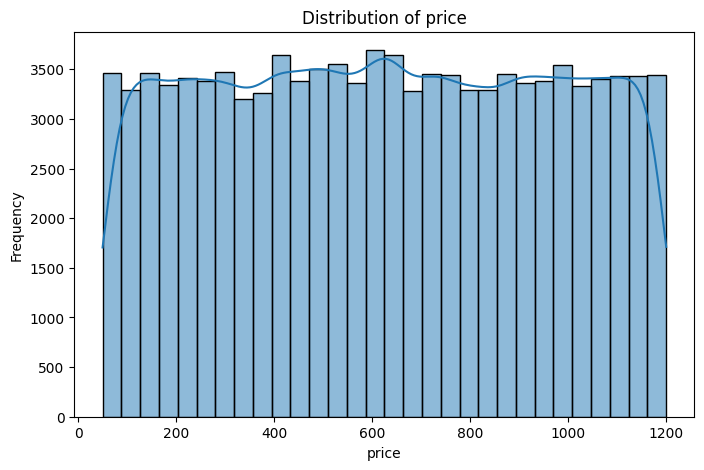

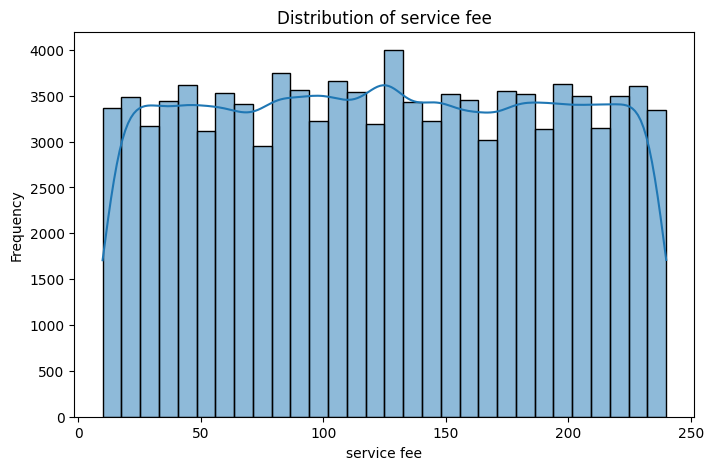

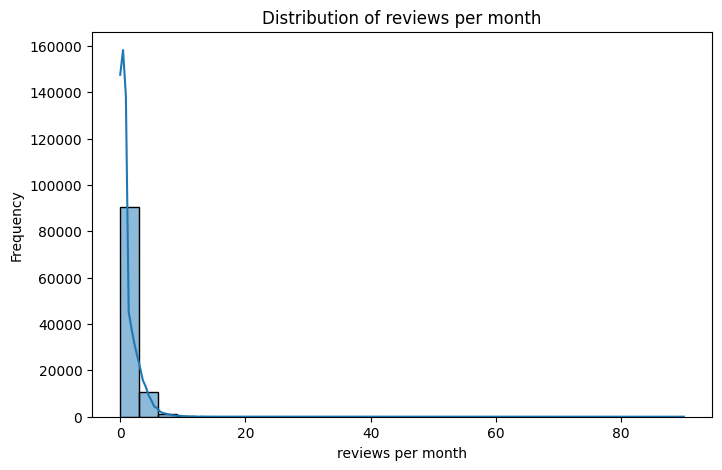

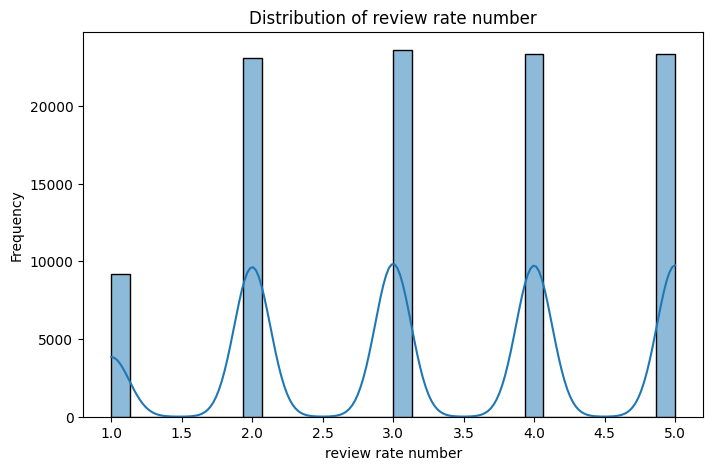

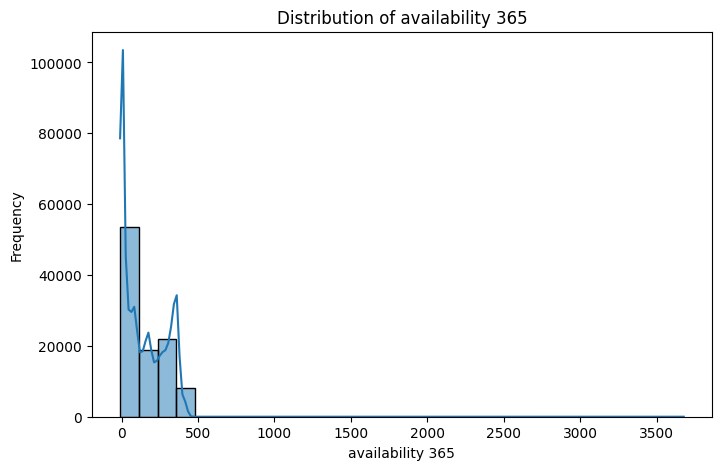

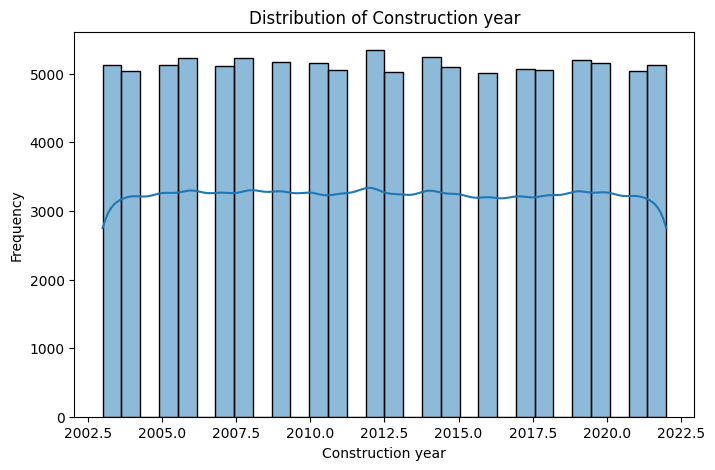

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'service fee', 'reviews per month', 'review rate number', 'availability 365', 'Construction year']

print("\nDistributions of Key Numerical Features")
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Distribution of Categorical Features (Bar Charts)

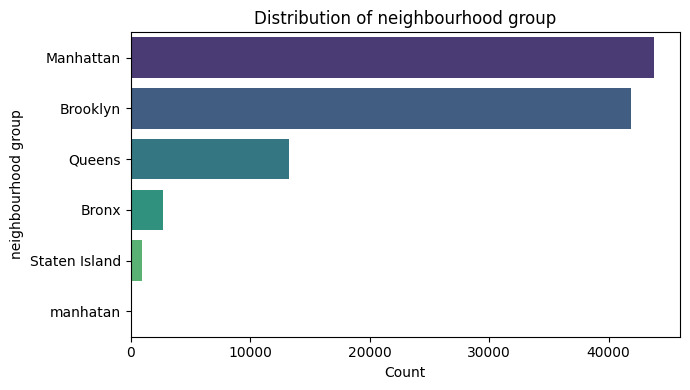

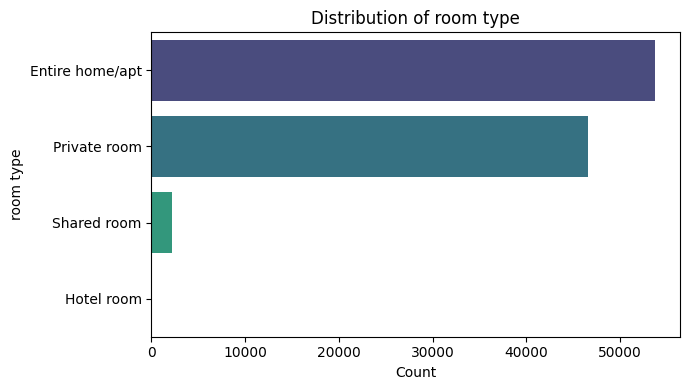

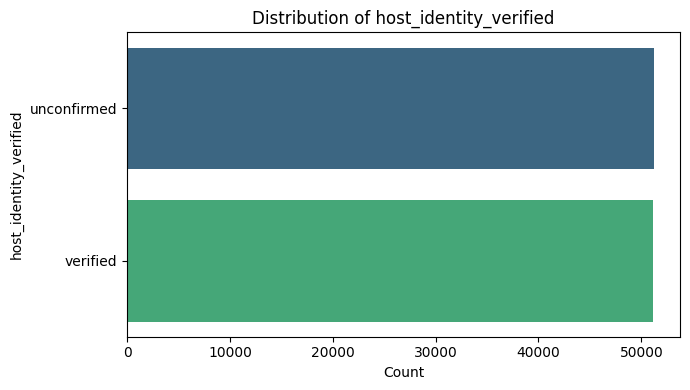

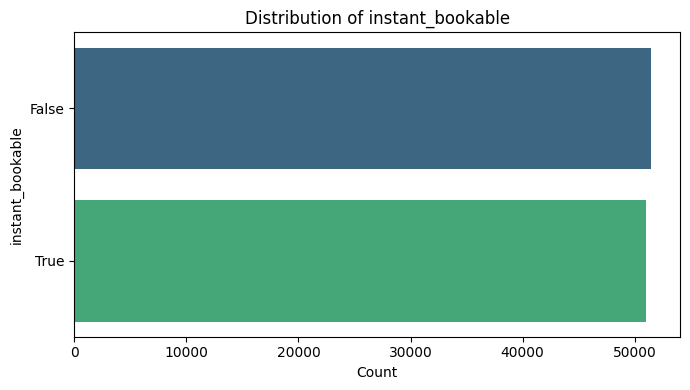

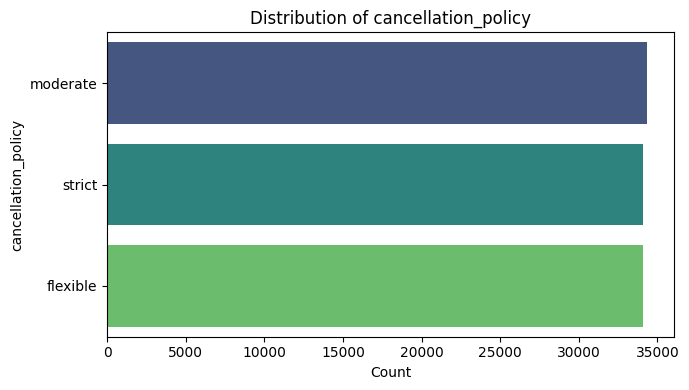

In [34]:
# Distributions of Key Categorical Features
categorical_cols = ['neighbourhood group', 'room type', 'host_identity_verified', 'instant_bookable', 'cancellation_policy']

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Feature Engineering

In [21]:

# 1. Listing Name Length
df['name_length'] = df['NAME'].fillna('').str.len()
print("\nCreated 'name_length' feature.")

# 2: Date-based Features from 'last review'
df['last_review_year'] = df['last review'].dt.year
df['last_review_month'] = df['last review'].dt.month
df['last_review_day'] = df['last review'].dt.day
print("Extracted date features from 'last review'.")

# row with new features
display(df[['NAME', 'name_length', 'last review', 'last_review_year', 'last_review_month']].head())


Created 'name_length' feature.
Extracted date features from 'last review'.


,NAME,name_length,last review,last_review_year,last_review_month
0,Clean & quiet apt home by the park,34,2021-10-19,2021.0,10.0
1,Skylit Midtown Castle,21,2022-05-21,2022.0,5.0
2,THE VILLAGE OF HARLEM....NEW YORK !,35,NaT,NaN,NaN
3,NaN,0,2019-07-05,2019.0,7.0
4,Entire Apt: Spacious Studio/Loft by central park,48,2018-11-19,2018.0,11.0


Distribution of Property Types

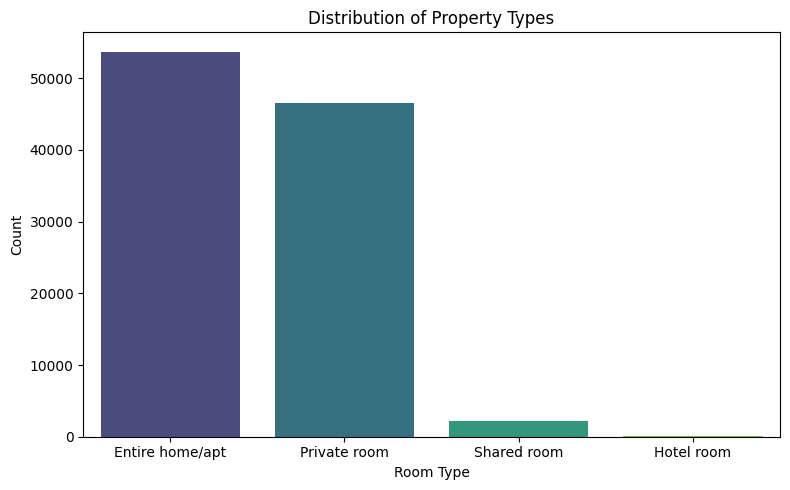

In [22]:
property_type = df['room type'].value_counts().to_frame()
plt.figure(figsize=(8, 5))
sns.barplot(x=property_type.index, y='count', data=property_type, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('property_type_distribution.png')

Price vs. Construction Year

Correlation between Construction Year and Price: -0.00


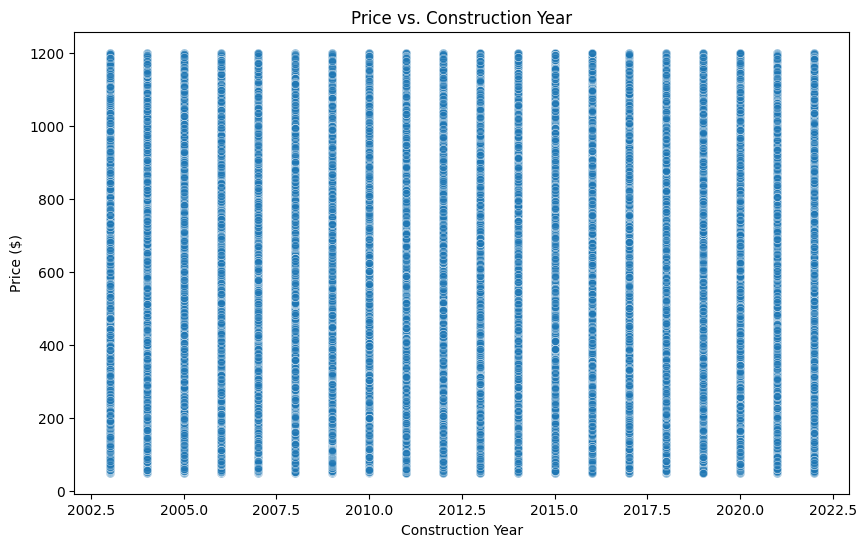

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.5)
plt.title('Price vs. Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')
plt.savefig('price_vs_construction_year.png')

correlation_year_price = df['Construction year'].corr(df['price'])
print(f"Correlation between Construction Year and Price: {correlation_year_price:.2f}")

Listings per Neighbourhood Group

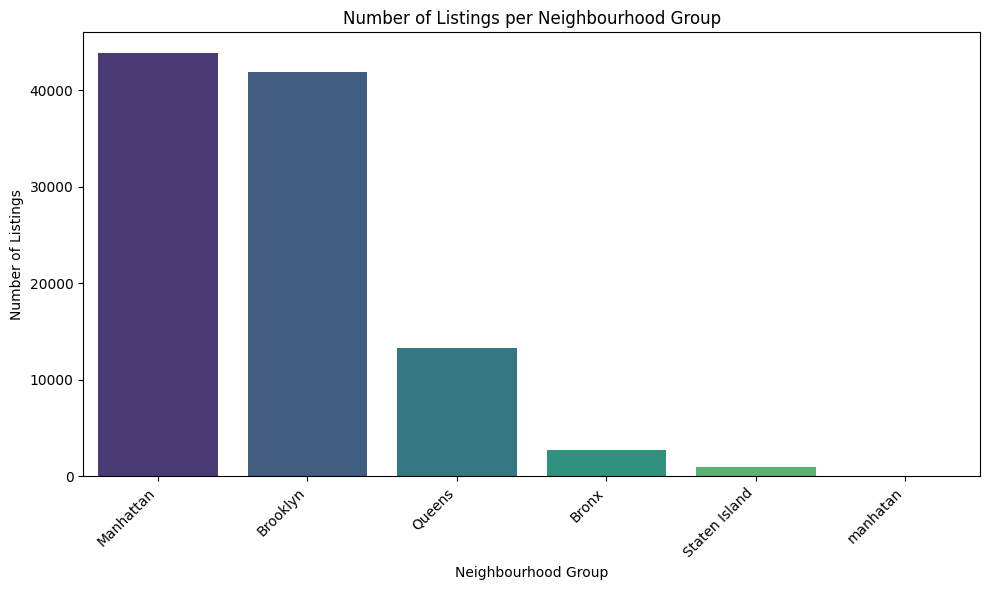

In [24]:
neighbourhood_counts = df['neighbourhood group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('listings_per_neighbourhood_group.png')

Top 10 Neighborhoods by Average Price

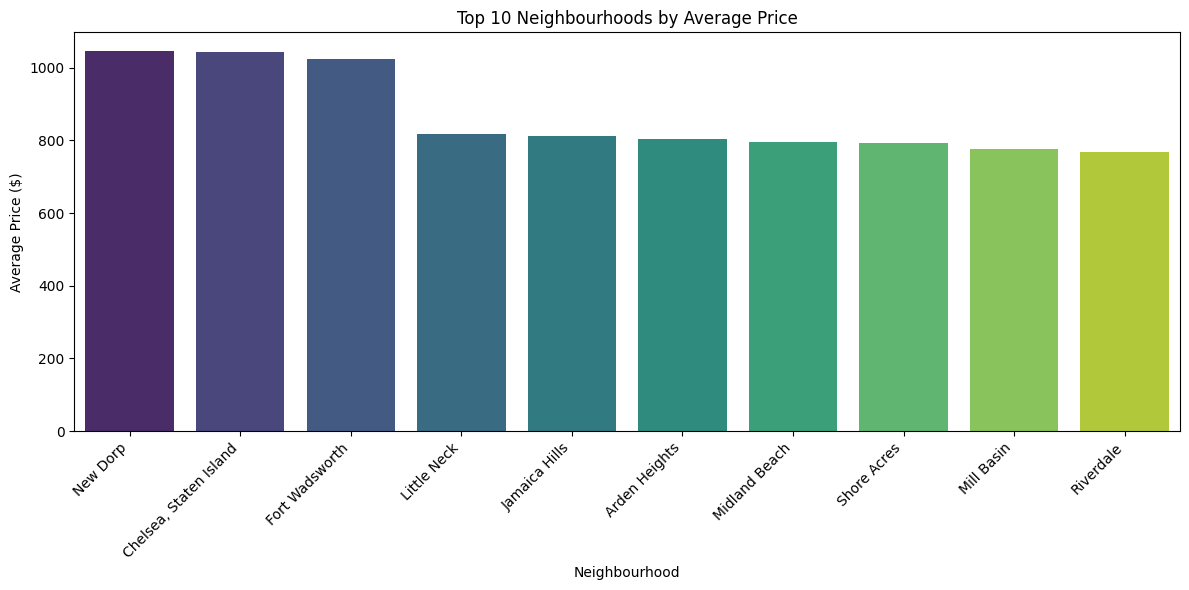

In [25]:
average_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean()
top_10_avg_price_neighbourhoods = average_price_by_neighbourhood.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_price_neighbourhoods.index, y=top_10_avg_price_neighbourhoods.values, palette='viridis')
plt.title('Top 10 Neighbourhoods by Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_neighbourhoods_by_price.png')

Top 10 Hosts by Listings

In [26]:
top_10_hosts = df.groupby(['host id', 'host name'])['calculated host listings count'].max().sort_values(ascending=False).head(10).reset_index()
print("\nTop 10 Hosts by Number of Listings:")
display(top_10_hosts)


Top 10 Hosts by Number of Listings:


,host id,host name,calculated host listings count
0,76431087156,Blueground,332.0
1,695353567,Blueground,332.0
2,97620664846,Blueground,332.0
3,58398584635,Blueground,332.0
4,52760110374,Blueground,332.0
5,59913507223,Blueground,332.0
6,69623510966,Blueground,332.0
7,20052088242,Blueground,332.0
8,83842788941,Blueground,332.0
9,46384126745,Blueground,332.0


Price vs. Service Fee


Correlation between Price and Service Fee: 1.00


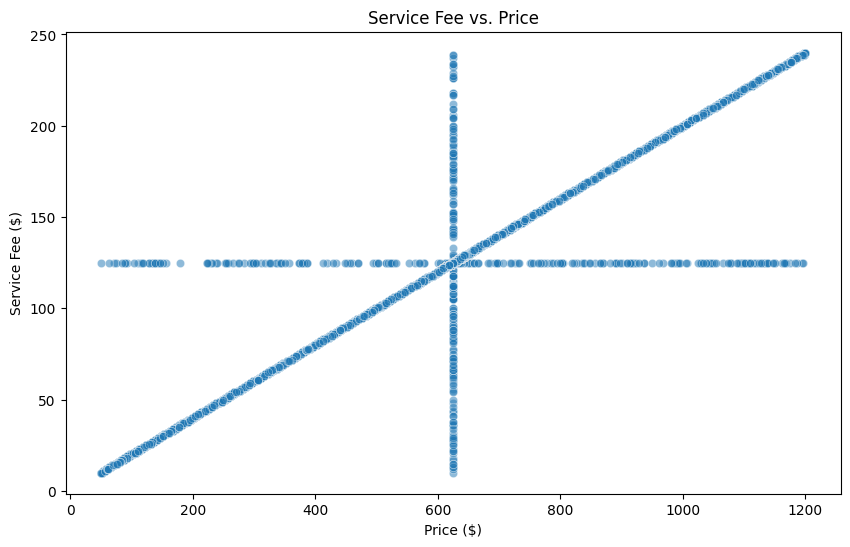

In [27]:
correlation_price_service_fee = df['price'].corr(df['service fee'])
print(f"\nCorrelation between Price and Service Fee: {correlation_price_service_fee:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.5)
plt.title('Service Fee vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.savefig('price_vs_service_fee.png')

Average Review Rate Analysis


All visualizations have been generated successfully.


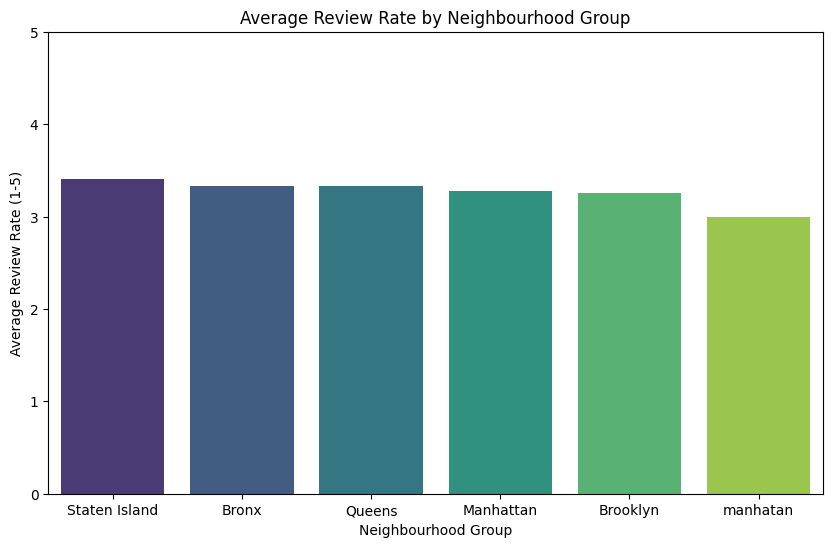

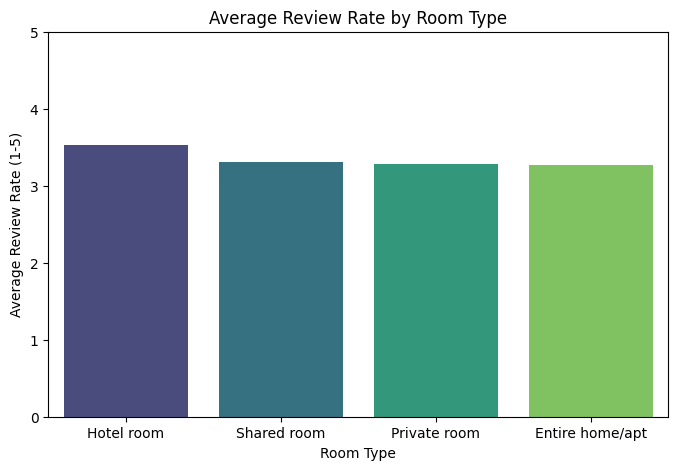

In [28]:
# By Neighbourhood Group
avg_review_rate_by_group = df.groupby('neighbourhood group')['review rate number'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_review_rate_by_group.index, y=avg_review_rate_by_group.values, palette='viridis')
plt.title('Average Review Rate by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate (1-5)')
plt.ylim(0, 5)
plt.savefig('avg_review_rate_by_group.png')

# By Room Type
avg_review_rate_by_room = df.groupby('room type')['review rate number'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_review_rate_by_room.index, y=avg_review_rate_by_room.values, palette='viridis')
plt.title('Average Review Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Review Rate (1-5)')
plt.ylim(0, 5)
plt.savefig('avg_review_rate_by_room.png')

print("\nAll visualizations have been generated successfully.")